# Exploring and Visualizing Data in Python

### 1. Loading Data

In [1]:
# import required libraries for data visualization and analysis
import pandas as pd
import numpy as np
from numpy import random

In [2]:
# Load data from file "adult.csv" as dataframe

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/data_mining/adult.csv") #google colab üzerinde  notebook kullandım.

Mounted at /content/drive


### 2. Exploring Data Structure

In [4]:
# Show summary of records. Print names of columns and their datatypes
#print(df) # tüm verileri göster 
print("\n********** Summary of records ***********\n")
df.info() # id,sutun,boyut ve icerik bilgisi,veritipi



********** Summary of records ***********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# Check your data looking with first 5 rows of table. Print the size of data  
head5 = df.head() # ilk 5 satır
print(head5)
print("Size of data:"+str(df.size))

   age  workclass  fnlwgt  ... hours-per-week  native-country income
0   25    Private  226802  ...             40   United-States  <=50K
1   38    Private   89814  ...             50   United-States  <=50K
2   28  Local-gov  336951  ...             40   United-States   >50K
3   44    Private  160323  ...             40   United-States   >50K
4   18          ?  103497  ...             30   United-States  <=50K

[5 rows x 15 columns]
Size of data:732630


### 3.Exploring Data Statictically

In [6]:
# Get statistical summary of data
statisticalSummary = df.describe()
print(statisticalSummary)

                age        fnlwgt  ...  capital-loss  hours-per-week
count  48842.000000  4.884200e+04  ...  48842.000000    48842.000000
mean      38.643585  1.896641e+05  ...     87.502314       40.422382
std       13.710510  1.056040e+05  ...    403.004552       12.391444
min       17.000000  1.228500e+04  ...      0.000000        1.000000
25%       28.000000  1.175505e+05  ...      0.000000       40.000000
50%       37.000000  1.781445e+05  ...      0.000000       40.000000
75%       48.000000  2.376420e+05  ...      0.000000       45.000000
max       90.000000  1.490400e+06  ...   4356.000000       99.000000

[8 rows x 6 columns]


In [7]:
# Find mean values of the first 10 records in dataframe
#print("İlk 10 satır:\n--------------")
#print(df[:10]) # ilk 10 satırı görmek için 
#print(df.head(10))
#print("\n------------\nOrtalamalar:\n------------")
meanOf10 = df[:10].mean() ##ortalamayı alıp yazdırmak için değişkene atadım.
print(meanOf10)

age                    35.8
fnlwgt             192239.5
educational-num         9.2
capital-gain         1079.1
capital-loss            0.0
hours-per-week         35.2
dtype: float64


### 4. Filtering Data 

In [8]:
# Get records whose "age" is greater and equal than 
greater25 = df[df["age"]>=25]
greater25

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [9]:
# Obtain a subspace of data with "Age","Gender" and "income" features
sutun_isimleri = ['age','gender','income'] # sutun isimleri 
df_agf = df[sutun_isimleri] # framei kopyala.
df_agf # frame i yazdır

#alternatif2 
#colNo=[0,9,14]
#df_col = df[df.columns[colNo]]
#print(df_col)



,age,gender,income
0,25,Male,<=50K
1,38,Male,<=50K
2,28,Male,>50K
3,44,Male,>50K
4,18,Female,<=50K
...,...,...,...
48837,27,Female,<=50K
48838,40,Male,>50K
48839,58,Female,<=50K
48840,22,Male,<=50K


### 5. Data Cleaning

In [10]:
# Check duplicate 
check_dup = df.duplicated().any() # duplicated veri var mı ? 
print("There is duplicated datas: "+str(check_dup))
if check_dup: 
  dups = df[df.duplicated(keep=False)] # verileri yazdır.
  print(dups)
else:
  print("No duplicated datas")

There is duplicated datas: True
       age workclass  fnlwgt  ... hours-per-week  native-country income
488     24   Private  194630  ...             35   United-States  <=50K
864     24   Private  194630  ...             35   United-States  <=50K
1319    37   Private   52870  ...             40   United-States  <=50K
1668    19   Private  130431  ...             36          Mexico  <=50K
1854    22   Private  137876  ...             20   United-States  <=50K
...    ...       ...     ...  ...            ...             ...    ...
46665   20         ?  203353  ...             40   United-States  <=50K
46979   22         ?  334593  ...             40   United-States  <=50K
47126   46   Private  133616  ...             40   United-States  <=50K
48274   19   Private  251579  ...             14   United-States  <=50K
48685   35   Private  379959  ...             40   United-States  <=50K

[101 rows x 15 columns]


In [11]:
# Convert categorical "martial-status" data to binary attibutes
df = df.rename(columns={"marital-status":"martial-status"}) # hocam veri içerisinde martial marital olarak yazılmış onu düzeltiyorum.
#print(df['martial-status'])
nums= pd.get_dummies(df["martial-status"]) #convertion işlemi pandas kütüphanesi içerisindeki fonksiyonla gerçekleniyor.
nums
#nums.head(30)


,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0
48838,0,0,1,0,0,0,0
48839,0,0,0,0,0,0,1
48840,0,0,0,0,1,0,0


In [12]:
# Check missing values in your data 
isMissing=df.isna().any() # Kayıp veri yok gibi görünüyor. Ama...
print(df.head(20)) # verinin ilk 20 satırını inceledigimde bazı verilerin ? oldugunu gördüm
print(isMissing) # ? işareti ile olan verileri missing olarak kabul ettim. 
df_nan= df.replace('?',np.nan) # ? olan verileri nan veri ile yer degistirdim
print("\n !!!! -> '?' olan veriler NaN olarak değiştirildi.\n")
isMissingNow=df_nan.isna().any() # kayıp verilerimizi simdi görebiliyoruz tabi yukarıda verileri inceledikten sonra ? araması da yapabilirdim 
print(isMissingNow) 
df_nan

    age         workclass  fnlwgt  ... hours-per-week  native-country income
0    25           Private  226802  ...             40   United-States  <=50K
1    38           Private   89814  ...             50   United-States  <=50K
2    28         Local-gov  336951  ...             40   United-States   >50K
3    44           Private  160323  ...             40   United-States   >50K
4    18                 ?  103497  ...             30   United-States  <=50K
5    34           Private  198693  ...             30   United-States  <=50K
6    29                 ?  227026  ...             40   United-States  <=50K
7    63  Self-emp-not-inc  104626  ...             32   United-States   >50K
8    24           Private  369667  ...             40   United-States  <=50K
9    55           Private  104996  ...             10   United-States  <=50K
10   65           Private  184454  ...             40   United-States   >50K
11   36       Federal-gov  212465  ...             40   United-States  <=50K

,age,workclass,fnlwgt,education,educational-num,martial-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
# Obtain a subset of data with nonmising values
df_noMissing =df_nan.dropna() #istersem bu verileri temizlemek için atabilirim ya da attribute özelligine göre replace yapabiliriz.mesela kategorik için mode ile fill edilebilir.
print(df_noMissing.notna().any()) # kayıp veri yoksa true döndür. Kayıp veri var mı yok mu diye kontrol ediyorum.
df_noMissing


age                True
workclass          True
fnlwgt             True
education          True
educational-num    True
martial-status     True
occupation         True
relationship       True
race               True
gender             True
capital-gain       True
capital-loss       True
hours-per-week     True
native-country     True
income             True
dtype: bool


,age,workclass,fnlwgt,education,educational-num,martial-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
# Fill missing values using any technique (mentioned in the lecture) according to data type
# numeric sutunlarda yukarıda gördügüm kadarıyla nan deger olmadıgı için ve kategorik labellar kaldıgından burada mod alıp doldurmayı tercih ettim.
cols_m = [1,3,5,6,7,8,9,13,14] #modu alınacak sutunlar
col_mods =[] #modları tutacak bir liste 
for x in cols_m :
  c = df_nan.columns[x] # column ismi döndürüyor. ki mod hesaplarken kullanalım.
  mod= df_nan[c].mode()[0] # mevcut columun mod al .
  col_mods.append(mod) # mevcut sutuna na degerlerini mod ile doldu
  df_filled = df_nan # df_nan'ı kopyala
  df_filled[c]=df_filled[c].replace(np.nan,mod) # nan verileri mod ile doldur.
print("NaN data var mı ? \n------------------")
print(df_filled.isna().any())
#df.head(20) #NaN verileri görmek için kontrol ettim.
#df_filled.head(20)  #NaN olmayanların ilk 20 sini inceledim.
df_filled


#df_nan.fillna(value)
#df_nan


NaN data var mı ? 
------------------
age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
martial-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool


,age,workclass,fnlwgt,education,educational-num,martial-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 6. Visualizing Data

##### 6.1. Univariate analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


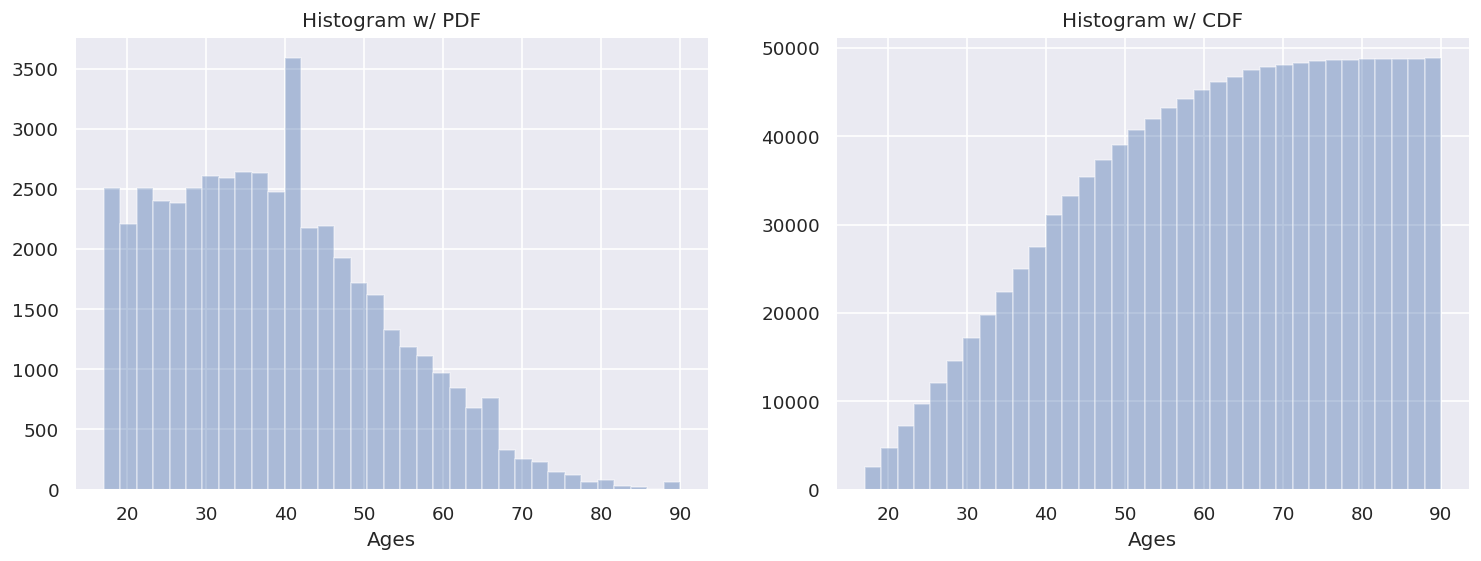

In [25]:
# "Age" distibution using histogram, pdf and cdf (using matplotlib  and seaborn)
import matplotlib.pyplot as plt
import seaborn as sns
#matplot dan subplot kullanılacak . seaborn'dan da distplot .
dt = df_filled
sns.set()
#plt.hist(dt["age"],bins=20,cumulative=True)
#plt.title("Basit matplotlib ile Age Histogram")
#plt.xlabel("Ages")
#plt.ylabel("Count")
#plt.show()

fig, eks = plt.subplots(1,2, figsize=(15,5),dpi=120)
eks[0].set_title("Histogram w/ PDF")
eks[1].set_title("Histogram w/ CDF")
args_cum = {"cumulative":True}
sns.distplot(dt["age"], bins=35, kde=False, axlabel='Ages', ax=eks[0]) #cumulative default olarak zaten false .
sns.distplot(dt["age"], bins=35, kde=False, axlabel='Ages',hist_kws=args_cum, ax=eks[1])
#sns.ecdfplot(dt["age"])


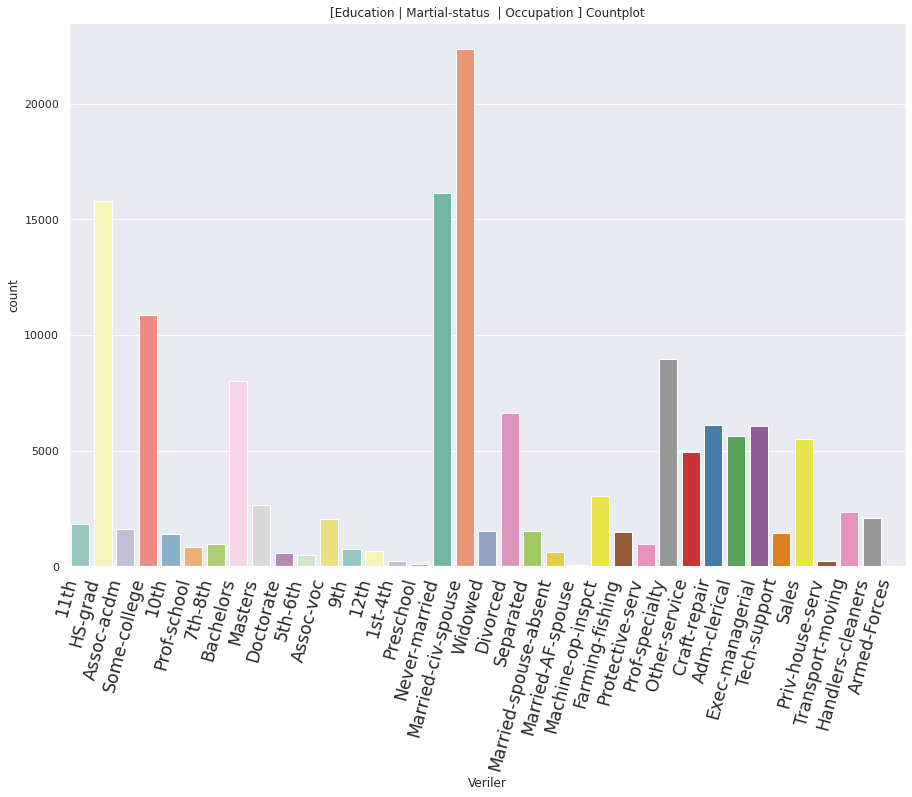

In [28]:
# Count plot for categorical attibute "education","martial-status" and "occupation" (using seaborn)

#serileri tek tek degiskenlerde tutuyorum sonra belli bir sıraya göre ucuca ekleyecegim.
ser1 = df_filled["education"]
ser2 = df_filled["martial-status"]
ser3 = df_filled["occupation"]
order = ser1.append(ser2.append(ser3)).unique() #birleştir ve aynı degerleri alma .

plt.figure(figsize=(15,10))

ax = sns.countplot(x=ser3, palette='Set1', order=order, zorder=3) #plotting process
ax = sns.countplot(x=ser2, palette='Set2', order=order, zorder=2)
ax = sns.countplot(x=ser1, palette='Set3', order=order)
ax = ax.set_xticklabels(ax.get_xticklabels(),  #ince ayarlar
                      rotation=75, #labelları daha net okumak için rotasyon
                      horizontalalignment='right', # sağa yaslı 
                      fontweight='light', # fontlar
                      fontsize='x-large')
plt.xlabel("Veriler")
plt.title("[Education | Martial-status  | Occupation ] Countplot")
plt.show()

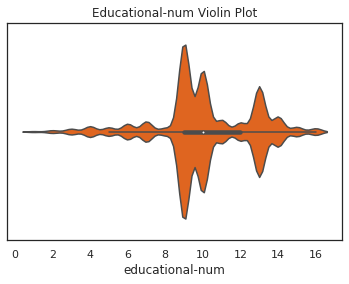

In [149]:
# Draw violin plot for "educational-num" feature
sns.violinplot(x="educational-num",data=df_filled,palette="hot")
plt.title("Educational-num Violin Plot")
plt.show()

# dümdüz violin


##### 6.2. Bivariate analysis

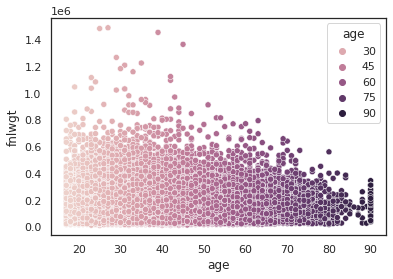

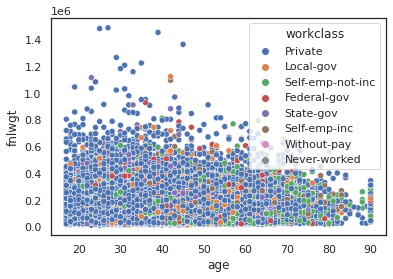

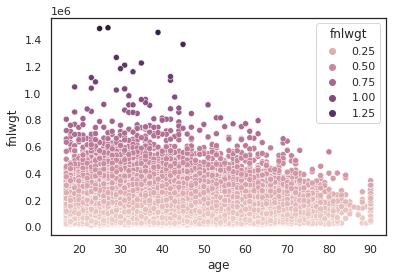

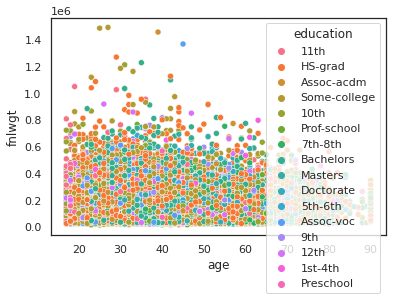

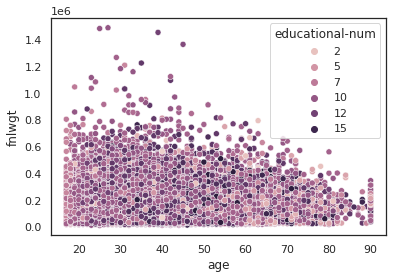

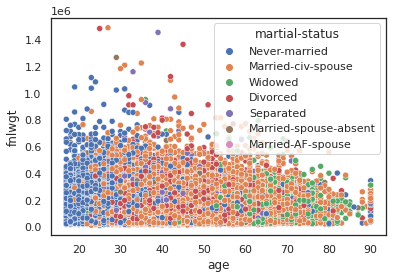

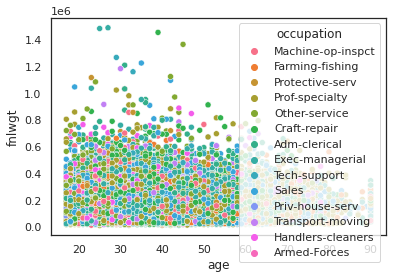

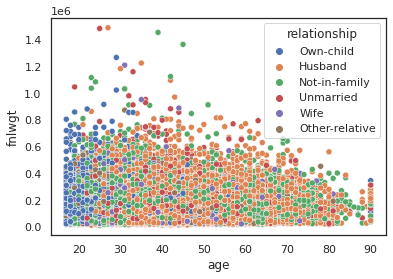

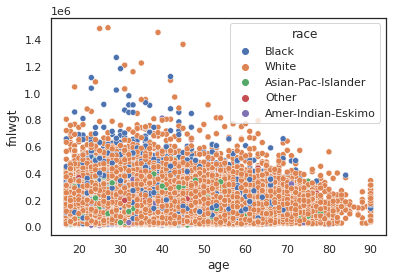

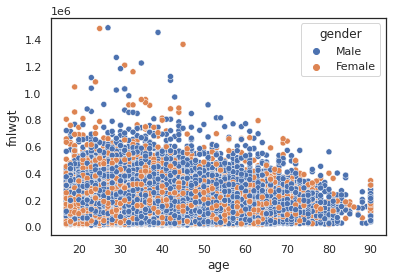

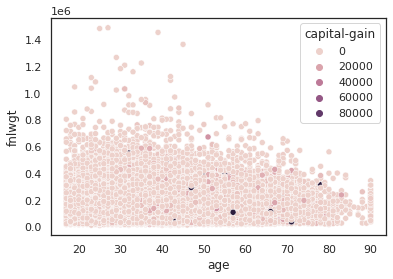

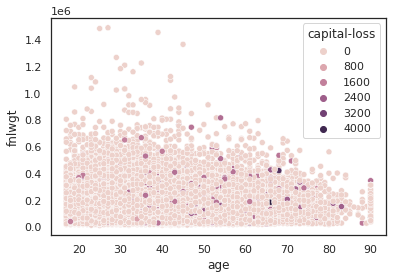

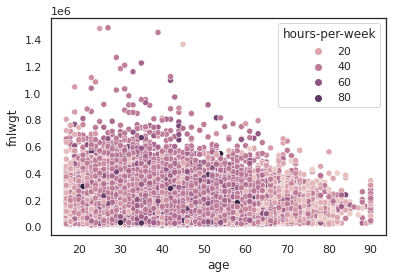

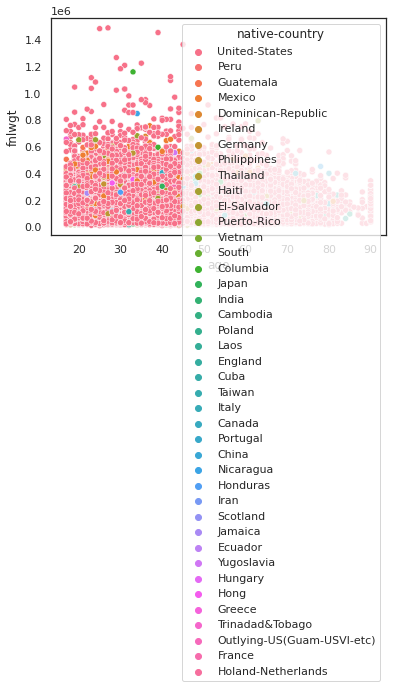

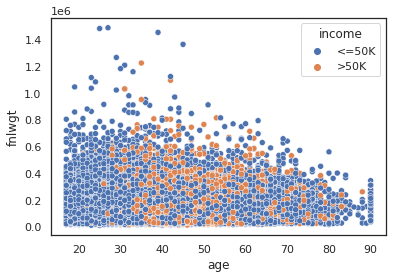

,age,workclass,fnlwgt,education,educational-num,martial-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [198]:
# Draw Seaborn scatter plot of "age" and "fnlwgt" features (colored according to classes (hint:hue))
#tema degistir.
sns.set_theme(style="white")
#plotları cizdir.

def grafikCiz(sinif):
  plt.figure()
  chart = sns.scatterplot(x="age",y="fnlwgt",data=df_filled,hue=sinif) #gelen sinif bilgisine göre hue ile renklendir
  plt.show(chart) #plotting..

colNames=[] #sutun isimlerinin tutulacagi list.
for s in df.columns: colNames.append(s) #tüm sutun isimlerini al.
#print(colNames) 
for s in colNames: #grafikleri array içersiindeki her sınıf için hue olarak cizdir.
  grafikCiz(s) # grafikciz fonksiyonunu calsitir. S : sutun ismi.


##### 6.3. Multivariate analysis

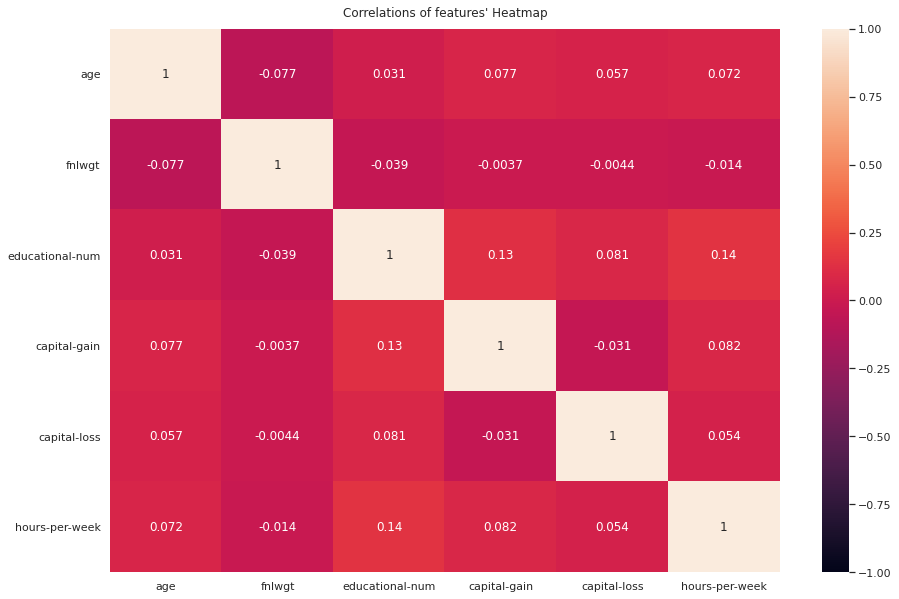

In [35]:
# Calculate correlation of features and show using heatmap of Seaborn.
correlation = df_filled.corr() # calculate correlation 
plt.figure(figsize=(15,10)) # plot size 
heatmap = sns.heatmap(correlation,vmin=-1,vmax=1,annot=True) # -1 ile 1 arasında degerleri heatmap üzerinde göster .
heatmap.set_title("Correlations of features' Heatmap" , fontdict={'fontsize':12}, pad=12); # başlık, yazı tipi ve arasındaki boşluklar 


> interpret plot

<Figure size 720x360 with 0 Axes>

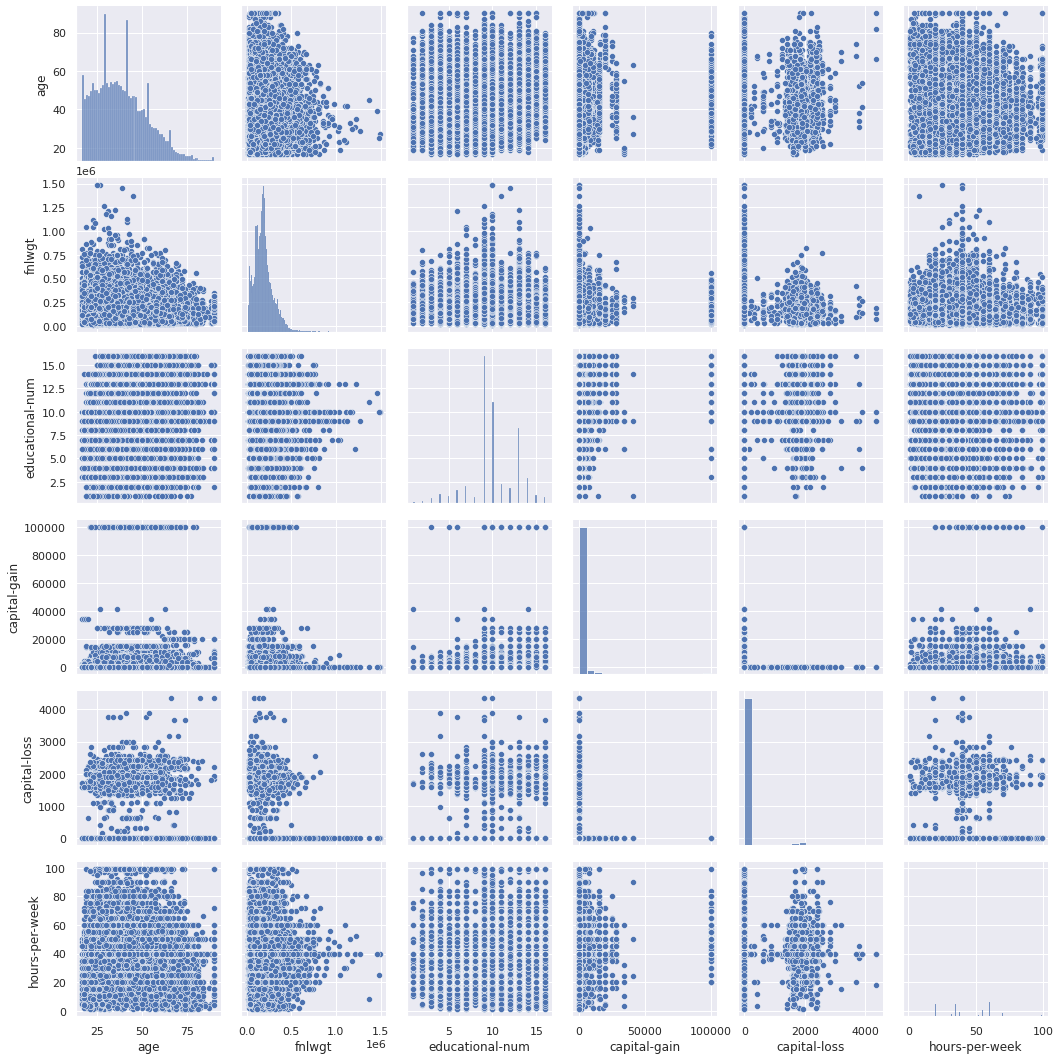

In [37]:
# Draw seaborn pair plot demonstrating class info.
plt.figure(figsize=(10,5))
sns.pairplot(df_filled)

##### Which plots are suitable for categorical data? Which for numerical?
Actually it's depend on qualification of data however generally,i guess we can accept that usage, <br>
* for categorical : <b>countplot</b> ,histogram. <i>Because we can see count of categorical datas</i> <br>
* for numerical : <b>scatter</b>,histogram.<i>Because we can see relations between numerical data and also distributions. </i> </ul>
